In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns
from copy import deepcopy

import itertools

sns.set_style("darkgrid")

def flatten(t):
    return [item for sublist in t for item in sublist]

pd.set_option('max_columns', None)

In [2]:
#results_complete = pd.read_csv('./results_complete.csv', delimiter=';')
#results_complete = results_complete[results_complete['i_net_nas'] == True]
#results_complete_columns = list(results_complete.columns)

results_summary = pd.read_csv('./results_summary.csv', delimiter=';')
#results_summary = results_summary[results_summary['i_net_nas'] == True]
results_summary_columns = list(results_summary.columns)

results_summary.head(5)

function_family_maximum_depth  function_family_beta  \
0                              3                     1   
1                              3                     1   
2                              3                     1   
3                              3                     1   
4                              3                     1   

   function_family_decision_sparsity  function_family_fully_grown  \
0                                  1                         True   
1                                  1                         True   
2                                  1                         True   
3                                  1                         True   
4                                  1                         True   

  function_family_dt_type  \
0                 vanilla   
1                 vanilla   
2                 vanilla   
3                 vanilla   
4                 vanilla   

   function_family_basic_function_representation_length  \
0                                                 22      
1                                                 22      
2                                                 22      
3                                                 22      
4                                                 22      

   function_family_function_representation_length  data_number_of_variables  \
0                                             246                        17   
1                                             148                        10   
2                                             246                        17   
3                                             246                        17   
4                                              78                         5   

   data_num_classes data_categorical_indices  data_use_distribution_list  \
0                 2                       []                        True   
1                 2                       []                        True   
2                 2                       []                        True   
3                 2                       []                        True   
4                 2                       []                        True   

   data_random_parameters_distribution  data_max_distributions_per_class  \
0                                 True                                 1   
1                                 True                                 1   
2                                 True                                 2   
3                                 True                                 1   
4                                 True                                 1   

   data_fixed_class_probability data_dt_type_train  data_maximum_depth_train  \
0                         False            vanilla                         3   
1                         False            vanilla                         3   
2                         False            vanilla                         3   
3                         False            vanilla                         3   
4                         False            vanilla                         3   

   data_decision_sparsity_train data_function_generation_type  data_objective  \
0                             1                   distribtion  classification   
1                             1                   distribtion  classification   
2                             1                   distribtion  classification   
3                             1                   distribtion  classification   
4                             1                   distribtion  classification   

   data_x_max  data_x_min data_x_distrib  data_lambda_dataset_size  \
0           1           0        uniform                      5000   
1           1           0        uniform                      5000   
2           1           0        uniform                      5000   
3           1           0        uniform                      5000   
4 

In [3]:
colmuns_identifier = [
                  'function_family_maximum_depth',
                  'function_family_decision_sparsity', 
                  'function_family_dt_type',
                  'data_dt_type_train',
                  'data_maximum_depth_train',
                  'data_number_of_variables',
                  'data_noise_injected_level',
                  'data_function_generation_type',
                  'data_categorical_indices',
                  'lambda_net_lambda_network_layers',
                  'lambda_net_optimizer_lambda',
                  'i_net_dense_layers',
                  'i_net_dropout',
                  'i_net_learning_rate',
                  'i_net_loss',
                  'i_net_interpretation_dataset_size',
                  'i_net_function_representation_type',
                  'i_net_data_reshape_version',
                  'i_net_nas',
                  'i_net_nas_trials',
                  'evaluation_eval_data_description_eval_data_function_generation_type',
                  'evaluation_eval_data_description_eval_data_noise_injected_level',
                 ]


In [4]:
columns_inet = []
for column in results_summary_columns:
    if 'inet_scores' in column:
        columns_inet.append(column)
results_summary_inet = results_summary[flatten([colmuns_identifier, columns_inet])]

columns_inet_rename = []
for column in columns_inet:
    column = column.replace('inet_scores_', '')
    columns_inet_rename.append(column)

results_summary_inet.columns = flatten([colmuns_identifier, columns_inet_rename])

#results_summary_inet.insert(0, 'scores_type', 'inet_scores')
results_summary_inet.insert(0, 'scores_type', [dt_type + str(decision_sparsity) + '_inet_scores' for dt_type, decision_sparsity in zip(results_summary_inet['function_family_dt_type'].values, results_summary_inet['function_family_decision_sparsity'].values)])

    
print(results_summary_inet.shape)
results_summary_inet

(15, 393)


,scores_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_soft_binary_crossentropy,train_soft_binary_crossentropy_median,train_binary_crossentropy,train_binary_crossentropy_median,train_accuracy,train_accuracy_median,train_f1_score,train_f1_score_median,train_runtime,train_runtime_median,valid_soft_binary_crossentropy,valid_soft_binary_crossentropy_median,valid_binary_crossentropy,valid_binary_crossentropy_median,valid_accuracy,valid_accuracy_median,valid_f1_score,valid_f1_score_median,valid_runtime,valid_runtime_median,test_uniform_soft_binary_crossentropy,test_uniform_soft_binary_crossentropy_median,test_uniform_binary_crossentropy,test_uniform_binary_crossentropy_median,test_uniform_accuracy,test_uniform_accuracy_median,test_uniform_f1_score,test_uniform_f1_score_median,test_uniform_runtime,test_uniform_runtime_median,test_gamma_soft_binary_crossentropy,test_gamma_soft_binary_crossentropy_median,test_gamma_binary_crossentropy,test_gamma_binary_crossentropy_median,test_gamma_accuracy,test_gamma_accuracy_median,test_gamma_f1_score,test_gamma_f1_score_median,test_gamma_runtime,test_gamma_runtime_median,test_beta_soft_binary_crossentropy,test_beta_soft_binary_crossentropy_median,test_beta_binary_crossentropy,test_beta_binary_crossentropy_median,test_beta_accuracy,test_beta_accuracy_median,test_beta_f1_score,test_beta_f1_score_median,test_beta_runtime,test_beta_runtime_median,test_poisson_soft_binary_crossentropy,test_poisson_soft_binary_crossentropy_median,test_poisson_binary_crossentropy,test_poisson_binary_crossentropy_median,test_poisson_accuracy,test_poisson_accuracy_median,test_poisson_f1_score,test_poisson_f1_score_median,test_poisson_runtime,test_poisson_runtime_median,test_normal_soft_binary_crossentropy,test_normal_soft_binary_crossentropy_median,test_normal_binary_crossentropy,test_normal_binary_crossentropy_median,test_normal_accuracy,test_normal_accuracy_median,test_normal_f1_score,test_normal_f1_score_median,test_normal_runtime,test_normal_runtime_median,soft_binary_crossentropy_Adult_1000,binary_crossentropy_Adult_1000,accuracy_Adult_1000,f1_score_Adult_1000,runtime_Adult_1000,soft_binary_crossentropy_Titanic_1000,binary_crossentropy_Titanic_1000,accuracy_Titanic_1000,f1_score_Titanic_1000,runtime_Titanic_1000,soft_binary_crossentropy_Absenteeism_1000,binary_crossentropy_Absenteeism_1000,accuracy_Absenteeism_1000,f1_score_Absenteeism_1000,runtime_Absenteeism_1000,soft_binary_crossentropy_Loan House_1000,binary_crossentropy_Loan House_1000,accuracy_Loan House_1000,f1_score_Loan House_1000,runtime_Loan House_1000,soft_binary_crossentropy_Loan Credit_1000,binary_crossentropy_Loan Credit_1000,accuracy_Loan Credit_1000,f1_score_Loan Credit_1000,runtime_Loan Credit_1000,soft_binary_crossentropy_Medical Insurance_1000,binary_crossentropy_Medical Insurance_1000,accuracy_Medical Insurance_1000,f1_score_Medical Insurance_1000,runtime_Medical Insurance_1000,soft_binary_crossentropy_Bank Marketing_1000,binary_crossentropy_Bank Marketing_1000,accuracy_Bank Marketing_1000,f1_score_Bank Marketing_1000,runtime_Bank Marketing_1000,soft_binary_crossentropy_Brest Cancer Wisconsin_1000,binary_crossentropy_Brest Cancer Wisconsin_1000,accuracy_Brest Cancer Wisconsin_1000,f1_score_Brest Cancer Wisconsin_1000,runtime_Brest Cancer Wisconsin_1000,soft_binary_crossentropy_Wisconsin Diagnostic Breast Cancer_1000,binary_crossentropy_Wisconsin Diagnostic Breast Cancer_1000,ac

In [5]:
columns_dt_distilled = []
for column in results_summary_columns:
    if 'dt_scores' in column:
        if 'data_random' not in column:
            columns_dt_distilled.append(column)
results_summary_dt_distilled = results_summary[flatten([colmuns_identifier, columns_dt_distilled])]

columns_dt_distilled_rename = []
for column in columns_dt_distilled:
    column = column.replace('dt_scores_','')
    columns_dt_distilled_rename.append(column)

results_summary_dt_distilled.columns = flatten([colmuns_identifier, columns_dt_distilled_rename])
    
#results_summary_dt_distilled.insert(0, 'scores_type', 'dt_scores')
results_summary_dt_distilled.insert(0, 'scores_type', [dt_type + str(decision_sparsity) + '_dt_scores' for dt_type, decision_sparsity in zip(results_summary_dt_distilled['function_family_dt_type'].values, results_summary_dt_distilled['function_family_decision_sparsity'].values)])

    
print(results_summary_dt_distilled.shape)
results_summary_dt_distilled.head(5)


(15, 433)


,scores_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_soft_binary_crossentropy,train_soft_binary_crossentropy_median,train_binary_crossentropy,train_binary_crossentropy_median,train_accuracy,train_accuracy_median,train_f1_score,train_f1_score_median,train_runtime,train_runtime_median,valid_soft_binary_crossentropy,valid_soft_binary_crossentropy_median,valid_binary_crossentropy,valid_binary_crossentropy_median,valid_accuracy,valid_accuracy_median,valid_f1_score,valid_f1_score_median,valid_runtime,valid_runtime_median,test_uniform_soft_binary_crossentropy,test_uniform_soft_binary_crossentropy_median,test_uniform_binary_crossentropy,test_uniform_binary_crossentropy_median,test_uniform_accuracy,test_uniform_accuracy_median,test_uniform_f1_score,test_uniform_f1_score_median,test_uniform_runtime,test_uniform_runtime_median,test_uniform_soft_binary_crossentropy_train_data,test_uniform_soft_binary_crossentropy_train_data_median,test_uniform_binary_crossentropy_train_data,test_uniform_binary_crossentropy_train_data_median,test_uniform_accuracy_train_data,test_uniform_accuracy_train_data_median,test_uniform_f1_score_train_data,test_uniform_f1_score_train_data_median,test_gamma_soft_binary_crossentropy,test_gamma_soft_binary_crossentropy_median,test_gamma_binary_crossentropy,test_gamma_binary_crossentropy_median,test_gamma_accuracy,test_gamma_accuracy_median,test_gamma_f1_score,test_gamma_f1_score_median,test_gamma_runtime,test_gamma_runtime_median,test_gamma_soft_binary_crossentropy_train_data,test_gamma_soft_binary_crossentropy_train_data_median,test_gamma_binary_crossentropy_train_data,test_gamma_binary_crossentropy_train_data_median,test_gamma_accuracy_train_data,test_gamma_accuracy_train_data_median,test_gamma_f1_score_train_data,test_gamma_f1_score_train_data_median,test_beta_soft_binary_crossentropy,test_beta_soft_binary_crossentropy_median,test_beta_binary_crossentropy,test_beta_binary_crossentropy_median,test_beta_accuracy,test_beta_accuracy_median,test_beta_f1_score,test_beta_f1_score_median,test_beta_runtime,test_beta_runtime_median,test_beta_soft_binary_crossentropy_train_data,test_beta_soft_binary_crossentropy_train_data_median,test_beta_binary_crossentropy_train_data,test_beta_binary_crossentropy_train_data_median,test_beta_accuracy_train_data,test_beta_accuracy_train_data_median,test_beta_f1_score_train_data,test_beta_f1_score_train_data_median,test_poisson_soft_binary_crossentropy,test_poisson_soft_binary_crossentropy_median,test_poisson_binary_crossentropy,test_poisson_binary_crossentropy_median,test_poisson_accuracy,test_poisson_accuracy_median,test_poisson_f1_score,test_poisson_f1_score_median,test_poisson_runtime,test_poisson_runtime_median,test_poisson_soft_binary_crossentropy_train_data,test_poisson_soft_binary_crossentropy_train_data_median,test_poisson_binary_crossentropy_train_data,test_poisson_binary_crossentropy_train_data_median,test_poisson_accuracy_train_data,test_poisson_accuracy_train_data_median,test_poisson_f1_score_train_data,test_poisson_f1_score_train_data_median,test_normal_soft_binary_crossentropy,test_normal_soft_binary_crossentropy_median,test_normal_binary_crossentropy,test_normal_binary_crossentropy_median,test_normal_accuracy,test_normal_accuracy_median,test_normal_f1_score,test_normal_f1_score_median,test_normal_runtime,test_normal_runtime_median,test_normal_soft_binary_crossentropy_train_data,test_normal_soft_binary_cros

In [6]:
columns_dt_distilled_random_data = []
for column in results_summary_columns:
    if 'dt_scores' in column:
        if 'runtime' not in column:
            if 'data_random' in column:
                columns_dt_distilled_random_data.append(column)
        else: 
            columns_dt_distilled_random_data.append(column)
results_summary_dt_distilled_random_data = results_summary[flatten([colmuns_identifier, columns_dt_distilled_random_data])]

columns_dt_distilled_random_data_rename = []
for column in columns_dt_distilled_random_data:
    column = column.replace('dt_scores_','')
    column = column.replace('_data_random','')
    columns_dt_distilled_random_data_rename.append(column)

results_summary_dt_distilled_random_data.columns = flatten([colmuns_identifier, columns_dt_distilled_random_data_rename])

#results_summary_dt_distilled_random_data.insert(0, 'scores_type', 'dt_scores_data_random')
results_summary_dt_distilled_random_data.insert(0, 'scores_type', [dt_type + str(decision_sparsity) + '_dt_scores_data_random' for dt_type, decision_sparsity in zip(results_summary_dt_distilled_random_data['function_family_dt_type'].values, results_summary_dt_distilled_random_data['function_family_decision_sparsity'].values)])


print(results_summary_dt_distilled_random_data.shape)
results_summary_dt_distilled_random_data.head(5)

(15, 393)


,scores_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_soft_binary_crossentropy,train_soft_binary_crossentropy_median,train_binary_crossentropy,train_binary_crossentropy_median,train_accuracy,train_accuracy_median,train_f1_score,train_f1_score_median,train_runtime,train_runtime_median,valid_soft_binary_crossentropy,valid_soft_binary_crossentropy_median,valid_binary_crossentropy,valid_binary_crossentropy_median,valid_accuracy,valid_accuracy_median,valid_f1_score,valid_f1_score_median,valid_runtime,valid_runtime_median,test_uniform_soft_binary_crossentropy,test_uniform_soft_binary_crossentropy_median,test_uniform_binary_crossentropy,test_uniform_binary_crossentropy_median,test_uniform_accuracy,test_uniform_accuracy_median,test_uniform_f1_score,test_uniform_f1_score_median,test_uniform_runtime,test_uniform_runtime_median,test_gamma_soft_binary_crossentropy,test_gamma_soft_binary_crossentropy_median,test_gamma_binary_crossentropy,test_gamma_binary_crossentropy_median,test_gamma_accuracy,test_gamma_accuracy_median,test_gamma_f1_score,test_gamma_f1_score_median,test_gamma_runtime,test_gamma_runtime_median,test_beta_soft_binary_crossentropy,test_beta_soft_binary_crossentropy_median,test_beta_binary_crossentropy,test_beta_binary_crossentropy_median,test_beta_accuracy,test_beta_accuracy_median,test_beta_f1_score,test_beta_f1_score_median,test_beta_runtime,test_beta_runtime_median,test_poisson_soft_binary_crossentropy,test_poisson_soft_binary_crossentropy_median,test_poisson_binary_crossentropy,test_poisson_binary_crossentropy_median,test_poisson_accuracy,test_poisson_accuracy_median,test_poisson_f1_score,test_poisson_f1_score_median,test_poisson_runtime,test_poisson_runtime_median,test_normal_soft_binary_crossentropy,test_normal_soft_binary_crossentropy_median,test_normal_binary_crossentropy,test_normal_binary_crossentropy_median,test_normal_accuracy,test_normal_accuracy_median,test_normal_f1_score,test_normal_f1_score_median,test_normal_runtime,test_normal_runtime_median,soft_binary_crossentropy_Adult_1000,binary_crossentropy_Adult_1000,accuracy_Adult_1000,f1_score_Adult_1000,runtime_Adult_1000,soft_binary_crossentropy_Titanic_1000,binary_crossentropy_Titanic_1000,accuracy_Titanic_1000,f1_score_Titanic_1000,runtime_Titanic_1000,soft_binary_crossentropy_Absenteeism_1000,binary_crossentropy_Absenteeism_1000,accuracy_Absenteeism_1000,f1_score_Absenteeism_1000,runtime_Absenteeism_1000,soft_binary_crossentropy_Loan House_1000,binary_crossentropy_Loan House_1000,accuracy_Loan House_1000,f1_score_Loan House_1000,runtime_Loan House_1000,soft_binary_crossentropy_Loan Credit_1000,binary_crossentropy_Loan Credit_1000,accuracy_Loan Credit_1000,f1_score_Loan Credit_1000,runtime_Loan Credit_1000,soft_binary_crossentropy_Medical Insurance_1000,binary_crossentropy_Medical Insurance_1000,accuracy_Medical Insurance_1000,f1_score_Medical Insurance_1000,runtime_Medical Insurance_1000,soft_binary_crossentropy_Bank Marketing_1000,binary_crossentropy_Bank Marketing_1000,accuracy_Bank Marketing_1000,f1_score_Bank Marketing_1000,runtime_Bank Marketing_1000,soft_binary_crossentropy_Brest Cancer Wisconsin_1000,binary_crossentropy_Brest Cancer Wisconsin_1000,accuracy_Brest Cancer Wisconsin_1000,f1_score_Brest Cancer Wisconsin_1000,runtime_Brest Cancer Wisconsin_1000,soft_binary_crossentropy_Wisconsin Diagnostic Breast Cancer_1000,binary_crossentropy_Wisconsin Diagnostic Breast Cancer_1000,ac

In [7]:
results_summary_reduced = pd.concat([
                                     results_summary_inet, 
                                     results_summary_dt_distilled, 
                                     #results_summary_dt_distilled_random_data
                                    ]).reset_index(drop=True)
results_summary_reduced_columns = results_summary_reduced.columns
results_summary_reduced.head(5)

,scores_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_soft_binary_crossentropy,train_soft_binary_crossentropy_median,train_binary_crossentropy,train_binary_crossentropy_median,train_accuracy,train_accuracy_median,train_f1_score,train_f1_score_median,train_runtime,train_runtime_median,valid_soft_binary_crossentropy,valid_soft_binary_crossentropy_median,valid_binary_crossentropy,valid_binary_crossentropy_median,valid_accuracy,valid_accuracy_median,valid_f1_score,valid_f1_score_median,valid_runtime,valid_runtime_median,test_uniform_soft_binary_crossentropy,test_uniform_soft_binary_crossentropy_median,test_uniform_binary_crossentropy,test_uniform_binary_crossentropy_median,test_uniform_accuracy,test_uniform_accuracy_median,test_uniform_f1_score,test_uniform_f1_score_median,test_uniform_runtime,test_uniform_runtime_median,test_gamma_soft_binary_crossentropy,test_gamma_soft_binary_crossentropy_median,test_gamma_binary_crossentropy,test_gamma_binary_crossentropy_median,test_gamma_accuracy,test_gamma_accuracy_median,test_gamma_f1_score,test_gamma_f1_score_median,test_gamma_runtime,test_gamma_runtime_median,test_beta_soft_binary_crossentropy,test_beta_soft_binary_crossentropy_median,test_beta_binary_crossentropy,test_beta_binary_crossentropy_median,test_beta_accuracy,test_beta_accuracy_median,test_beta_f1_score,test_beta_f1_score_median,test_beta_runtime,test_beta_runtime_median,test_poisson_soft_binary_crossentropy,test_poisson_soft_binary_crossentropy_median,test_poisson_binary_crossentropy,test_poisson_binary_crossentropy_median,test_poisson_accuracy,test_poisson_accuracy_median,test_poisson_f1_score,test_poisson_f1_score_median,test_poisson_runtime,test_poisson_runtime_median,test_normal_soft_binary_crossentropy,test_normal_soft_binary_crossentropy_median,test_normal_binary_crossentropy,test_normal_binary_crossentropy_median,test_normal_accuracy,test_normal_accuracy_median,test_normal_f1_score,test_normal_f1_score_median,test_normal_runtime,test_normal_runtime_median,soft_binary_crossentropy_Adult_1000,binary_crossentropy_Adult_1000,accuracy_Adult_1000,f1_score_Adult_1000,runtime_Adult_1000,soft_binary_crossentropy_Titanic_1000,binary_crossentropy_Titanic_1000,accuracy_Titanic_1000,f1_score_Titanic_1000,runtime_Titanic_1000,soft_binary_crossentropy_Absenteeism_1000,binary_crossentropy_Absenteeism_1000,accuracy_Absenteeism_1000,f1_score_Absenteeism_1000,runtime_Absenteeism_1000,soft_binary_crossentropy_Loan House_1000,binary_crossentropy_Loan House_1000,accuracy_Loan House_1000,f1_score_Loan House_1000,runtime_Loan House_1000,soft_binary_crossentropy_Loan Credit_1000,binary_crossentropy_Loan Credit_1000,accuracy_Loan Credit_1000,f1_score_Loan Credit_1000,runtime_Loan Credit_1000,soft_binary_crossentropy_Medical Insurance_1000,binary_crossentropy_Medical Insurance_1000,accuracy_Medical Insurance_1000,f1_score_Medical Insurance_1000,runtime_Medical Insurance_1000,soft_binary_crossentropy_Bank Marketing_1000,binary_crossentropy_Bank Marketing_1000,accuracy_Bank Marketing_1000,f1_score_Bank Marketing_1000,runtime_Bank Marketing_1000,soft_binary_crossentropy_Brest Cancer Wisconsin_1000,binary_crossentropy_Brest Cancer Wisconsin_1000,accuracy_Brest Cancer Wisconsin_1000,f1_score_Brest Cancer Wisconsin_1000,runtime_Brest Cancer Wisconsin_1000,soft_binary_crossentropy_Wisconsin Diagnostic Breast Cancer_1000,binary_crossentropy_Wisconsin Diagnostic Breast Cancer_1000,ac

In [8]:
colmuns_identifier.append('scores_type')
not_considered_random_dataset_sizes = ['1000', '100000', '1000000']

In [9]:
def get_results_summary_reduced_for_metric(config, metric='accuracy', soft=False):
    
    results_summary_reduced_metric_columns = []
    for column in results_summary_reduced_columns:  
        if metric in column:
            if 'soft' not in column and not soft:           
                if 'median' not in column:
                    tokens = column.split('_')
                    integer = [token for token in tokens if token.isdigit()]
                    if len(integer) > 0:
                        integer = integer[0]
                        if integer not in not_considered_random_dataset_sizes:                    
                            results_summary_reduced_metric_columns.append(column)
                    else:
                        if 'TRAIN_DATA' not in column:
                            results_summary_reduced_metric_columns.append(column)

    results_summary_reduced_metric_with_identifier_columns = flatten([colmuns_identifier, results_summary_reduced_metric_columns])
    results_summary_reduced_metric_with_identifier = results_summary_reduced[results_summary_reduced_metric_with_identifier_columns]
    results_summary_reduced_metric_with_identifier.head(5)    
    
    
    results_summary_reduced_metric_plot = results_summary_reduced_metric_with_identifier

    try:
        results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['i_net_nas'] == config['nas']]
    except:
        pass
    
    if config['nas'] == True:
        try:
            results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['i_net_nas_trials'] == config['nas_trials']]
        except:
            pass    
    else:
        try:
            if isinstance(config['inet_structure'], list):
                inet_structure_string_query = 'i_net_dense_layers == "' + config['inet_structure'][0] + '"'
                for inet_structure_string in config['inet_structure'][1:]:
                    inet_structure_string_query += ' | ' +'i_net_dense_layers == "' + inet_structure_string + '"'
                
                results_summary_reduced_metric_plot = results_summary_reduced_metric_plot.query(inet_structure_string_query)
                    
            else:
                results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['i_net_dense_layers'] == config['inet_structure']]
        except:
            pass
    
    try:
        results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['i_net_loss'] == config['loss']]
    except:
        pass
    
    try:
        results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['data_noise_injected_level'] == config['noise_injected_level']]
    except:
        pass
    try:
        results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['data_categorical_indices'] == config['categorical_indices']]
    except:
        pass    
    try:
        results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['i_net_data_reshape_version'] == config['data_reshape_version']]
    except:
        pass
    try:
        results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['data_function_generation_type'] == config['function_generation_type']]
    except:
        pass        
        
    results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['data_number_of_variables'].isin(config['number_of_variables'])]
    results_summary_reduced_metric_plot = results_summary_reduced_metric_plot[results_summary_reduced_metric_plot['function_family_maximum_depth'].isin(config['maximum_depth'])]

    results_summary_reduced_metric_plot_columns = list(results_summary_reduced_metric_plot.columns)
    result_columns = []
    identifier_columns = []
    for column in results_summary_reduced_metric_plot_columns:
        if metric in column:
            result_columns.append(column)
        else:
            identifier_columns.append(column)
    number_of_results = results_summary_reduced_metric_plot.shape[0]

    results_summary_reduced_metric_plot_single_column_identifier = pd.concat([results_summary_reduced_metric_plot[identifier_columns] for _ in range(len(result_columns))], axis=0)
    results_summary_reduced_metric_plot_single_column_identifier['result_identifier'] = flatten([[result_column]*number_of_results for result_column in result_columns])
    #results_summary_reduced_metric_plot_single_column_identifier['result_identifier'] = flatten([[i]*number_of_results for i in range(len(result_columns))])

    results_summary_reduced_metric_plot_single_column_results = pd.concat([results_summary_reduced_metric_plot[result_column] for result_column in result_columns], axis=0)
    results_summary_reduced_metric_plot_single_column_results.name = 'score'

    results_summary_reduced_metric_plot = pd.concat([results_summary_reduced_metric_plot_single_column_identifier, results_summary_reduced_metric_plot_single_column_results], axis=1)

    results_summary_reduced_metric_plot = results_summary_reduced_metric_plot.sort_values(by=['function_family_dt_type', 'function_family_decision_sparsity'], ascending=(False, True))
    
    
    return results_summary_reduced_metric_plot
    

In [32]:
def plot_results(data_reduced, col, x, y, hue, plot_type=sns.barplot, aspect=1.5, col_wrap=2):
    
    #sns.set(rc={'figure.figsize':(20,10)})
    
    g = sns.FacetGrid(data_reduced, 
                      col=col,
                      ##hue='scores_type', 
                      #height=5, 
                      col_wrap=col_wrap,
                      aspect=aspect,
                      ##legend_out=False,
                     )
    g.map(plot_type, 
          x, 
          y, 
          hue,
          hue_order=np.unique(data_reduced[hue]),
          ##figsize=(20,10),
          palette=sns.color_palette(),#'colorblind'
          ##order=np.unique(results_summary_reduced_accuracy_plot["scores_type"]),
         )
    g.add_legend(fontsize=12,
               ncol=3,
               bbox_to_anchor=(0.5, -0.025),
               borderaxespad=0)    
    
    return plt.gcf()

In [11]:
figsize = (20, 10)
font_scale = 2.5

legend_fontsize = 25
legend_loc = 2

color_1 = '#84b7e9'#'#c0d6ff'
color_2 = '#0a6fd3'#'#96bcff'
color_3 = '#06427e'#'#6ca1ff'

In [12]:
datasets = {
            'Adult': 65,
            'Titanic': 9,
            'Absenteeism': 15,
            'Loan House': 17,
            'Loan Credit': 32,
            'Medical Insurance': 6,
            'Bank Marketing': 17,
            'Brest Cancer Wisconsin': 9,
            'Wisconsin Diagnostic Breast Cancer': 10,
            'Wisconsin Prognostic Breast Cancer': 10,
            'Abalone': 10,
            'Car': 21,
           }

/home/smarton/anaconda3/envs/XAI/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/smarton/anaconda3/envs/XAI/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


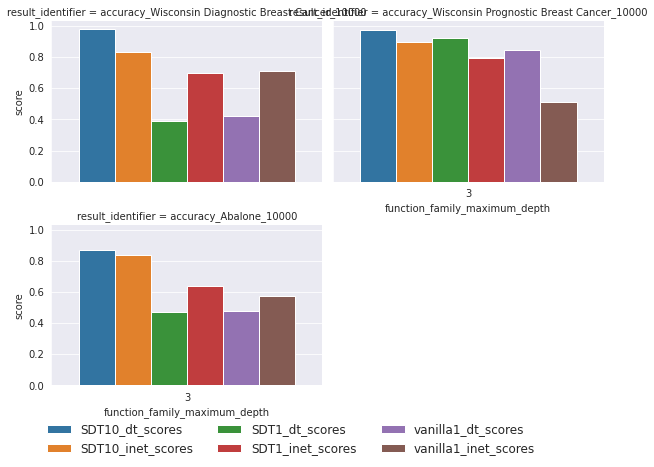

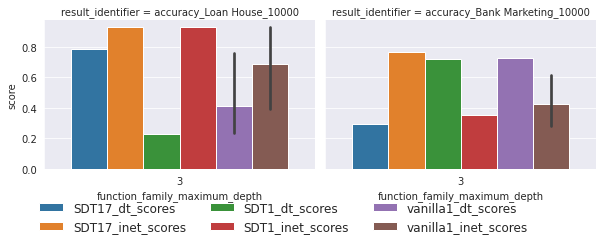

In [13]:
for unique_value in np.unique(list(datasets.values())):
    
    key_list = []
    for key, value in datasets.items():
        if unique_value == value:
            key_list.append(key)
    
    try:        
        config = {
            'inet_structure': ['[4096, 2048]', '[2048, 1024]'],#'[1024, 1024, 256, 2048, 2048]',
            'loss': 'binary_crossentropy', # 'binary_crossentropy', 'soft_binary_crossentropy'

            'noise_injected_level': 0.2, #0, 0.2
            #'data_noise': 0.1,
            
            #'data_reshape_version': 'None', #'None', '3' =autoencode
            #'function_generation_type': 'random_decision_tree_trained', #make_classification_trained, random_decision_tree_trained

            'nas': False, # 'True', 'False'
            'nas_trials': 20, #20, 100

            'number_of_variables': [unique_value], # [10]
            'maximum_depth': [3, 4, 5], # [3, 4, 5]
        }

        results_summary_reduced_accuracy_plot = get_results_summary_reduced_for_metric(config, metric='accuracy', soft=False)

        
        plot_data = results_summary_reduced_accuracy_plot[results_summary_reduced_accuracy_plot['result_identifier'].str.contains('|'.join(key_list))]
        plot = plot_results(
                             data_reduced=plot_data,
                             col='result_identifier',
                             x='function_family_maximum_depth',
                             y='score',
                             hue='scores_type',
                             plot_type=sns.barplot
                            )    
    except AttributeError:
        pass
    

In [14]:
datasets = {
            'Loan House': 17,
           }

/home/smarton/anaconda3/envs/XAI/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


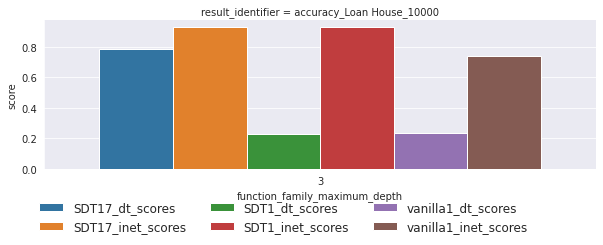

In [36]:
for unique_value in np.unique(list(datasets.values())):
    
    key_list = []
    for key, value in datasets.items():
        if unique_value == value:
            key_list.append(key)
    
    try:        
        config = {
            'inet_structure': '[4096, 2048]',#'[1024, 1024, 256, 2048, 2048]',
            'loss': 'binary_crossentropy', # 'binary_crossentropy', 'soft_binary_crossentropy'

            'noise_injected_level': 0.2, #0, 0.2
            #'data_noise': 0.1,
            
            #'data_reshape_version': 'None', #'None', '3' =autoencode
            #'function_generation_type': 'random_decision_tree_trained', #make_classification_trained, random_decision_tree_trained

            'nas': False, # 'True', 'False'
            'nas_trials': 20, #20, 100

            'number_of_variables': [unique_value], # [10]
            'maximum_depth': [3, 4, 5], # [3, 4, 5]
        }

        results_summary_reduced_accuracy_plot = get_results_summary_reduced_for_metric(config, metric='accuracy', soft=False)

        
        plot_data = results_summary_reduced_accuracy_plot[results_summary_reduced_accuracy_plot['result_identifier'].str.contains('|'.join(key_list))]
        plot = plot_results(
                             data_reduced=plot_data,
                             col='result_identifier',
                             x='function_family_maximum_depth',
                             y='score',
                             hue='scores_type',
                             plot_type=sns.barplot,
                             col_wrap=1,
                             aspect=3,
                            )    
    except AttributeError:
        pass
    

In [16]:
plot_data[plot_data['result_identifier'] == 'accuracy_Bank Marketing_10000']

,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,scores_type,result_identifier,score


In [17]:
plot_data[plot_data['result_identifier'] == 'accuracy_Loan House_10000']

,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,scores_type,result_identifier,score
3,3,1,vanilla,vanilla,3,17,0.2,distribtion,[],[128],adam,"[4096, 2048]","[0.2, 0.2]",0.001,binary_crossentropy,20000,3,None,False,60,make_classification,0,vanilla1_inet_scores,accuracy_Loan House_10000,0.737705
18,3,1,vanilla,vanilla,3,17,0.2,distribtion,[],[128],adam,"[4096, 2048]","[0.2, 0.2]",0.001,binary_crossentropy,20000,3,None,False,60,make_classification,0,vanilla1_dt_scores,accuracy_Loan House_10000,0.237705
11,3,1,SDT,vanilla,3,17,0.2,distribtion,[],[128],adam,"[4096, 2048]","[0.2, 0.2]",0.001,binary_crossentropy,20000,1,None,False,60,make_classification,0,SDT1_inet_scores,accuracy_Loan House_10000,0.926230
26,3,1,SDT,vanilla,3,17,0.2,distribtion,[],[128],adam,"[4096, 2048]","[0.2, 0.2]",0.001,binary_crossentropy,20000,1,None,False,60,make_classification,0,SDT1_dt_scores,accuracy_Loan House_10000,0.229508
6,3,17,SDT,vanilla,3,17,0.2,distribtion,[],[128],adam,"[4096, 2048]","[0.2, 0.2]",0.001,binary_crossentropy,20000,1,None,False,60,make_classification,0,SDT17_inet_scores,accuracy_Loan House_10000,0.926230
21,3,17,SDT,vanilla,3,17,0.2,distribtion,[],[128],adam,"[4096, 2048]","[0.2, 0.2]",0.001,binary_crossentropy,20000,1,None,False,60,make_classification,0,SDT17_dt_scores,accuracy_Loan House_10000,0.786885


/home/smarton/anaconda3/envs/XAI/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/smarton/anaconda3/envs/XAI/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/smarton/anaconda3/envs/XAI/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


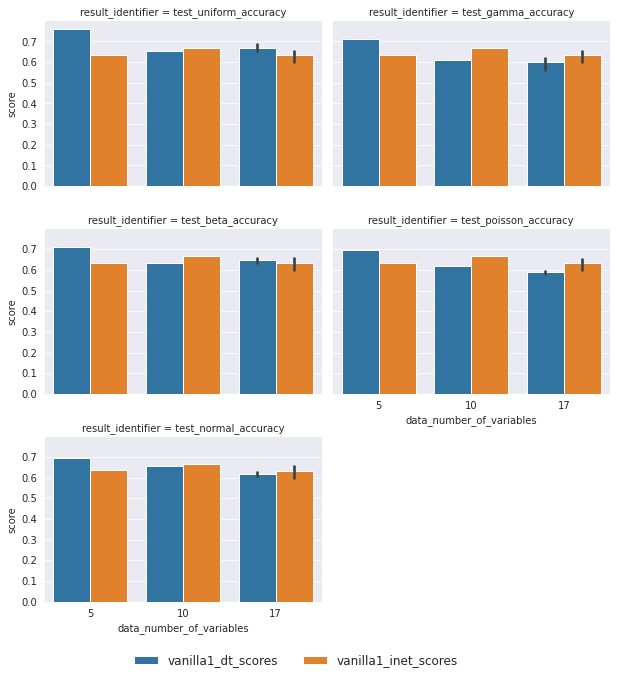

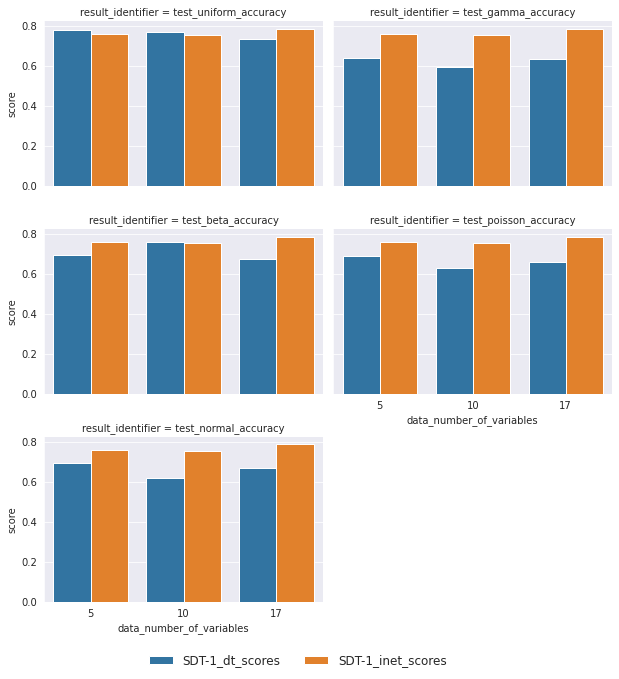

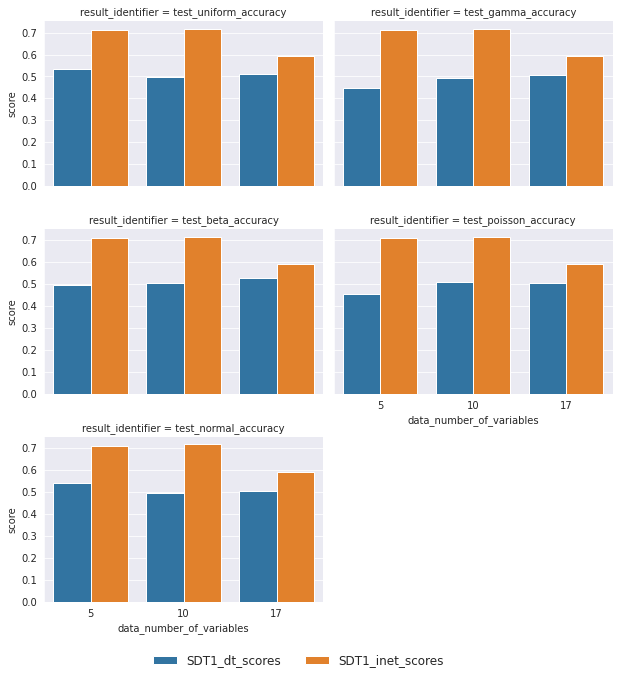

In [18]:
metric = 'accuracy'
key_list = ['uniform', 'normal', 'gamma', 'beta', 'poisson']

key_list = ['test_' + key + '_' + metric  for key in key_list]

try:        
    config = {
        'inet_structure': ['[4096, 2048]', '[2048, 1024]'],#'[1024, 1024, 256, 2048, 2048]',
        'loss': 'binary_crossentropy', # 'binary_crossentropy', 'soft_binary_crossentropy'

        'noise_injected_level': 0.2, #0, 0.2
        #'data_noise': 0.1,

        #'data_reshape_version': 'None', #'None', '3' =autoencode
        #'function_generation_type': 'random_decision_tree_trained', #make_classification_trained, random_decision_tree_trained

        'nas': False, # 'True', 'False'
        'nas_trials': 20, #20, 100

        'number_of_variables': [5, 10, 17], # [10]
        'maximum_depth': [3], # [3, 4, 5]
    }


    results_summary_reduced_accuracy_plot = get_results_summary_reduced_for_metric(config, metric=metric, soft=False)
    
    scores_type_adjusted = results_summary_reduced_accuracy_plot['scores_type'].values
    scores_type_adjusted = [string.replace('SDT10', 'SDT-1') for string in scores_type_adjusted]
    scores_type_adjusted = [string.replace('SDT5', 'SDT-1') for string in scores_type_adjusted]
    scores_type_adjusted = [string.replace('SDT15', 'SDT-1') for string in scores_type_adjusted]
    scores_type_adjusted = [string.replace('SDT17', 'SDT-1') for string in scores_type_adjusted]
    results_summary_reduced_accuracy_plot['scores_type'] = scores_type_adjusted    

    for dt_type in ['vanilla', 'SDT-1', 'SDT1']:

        plot_data = results_summary_reduced_accuracy_plot[results_summary_reduced_accuracy_plot['result_identifier'].str.contains('|'.join(key_list))]
        plot_data = plot_data[~plot_data['result_identifier'].str.contains('train_data')]
        plot_data = plot_data[plot_data['scores_type'].str.contains(dt_type)]
        
        plot = plot_results(
                             data_reduced=plot_data,
                             col='result_identifier',
                             x='data_number_of_variables',
                             y='score',
                             hue='scores_type',
                             plot_type=sns.barplot
                            )    
except AttributeError:
    pass

In [19]:
def reduce_rows_from_config(dataframe, config):


    try:
        dataframe = dataframe[dataframe['i_net_nas'] == config['nas']]
    except:
        pass
    
    if config['nas'] == True:
        try:
            dataframe = dataframe[dataframe['i_net_nas_trials'] == config['nas_trials']]
        except:
            pass    
    else:
        try:
            if isinstance(config['inet_structure'], list):
                inet_structure_string_query = 'i_net_dense_layers == "' + config['inet_structure'][0] + '"'
                for inet_structure_string in config['inet_structure'][1:]:
                    inet_structure_string_query += ' | ' +'i_net_dense_layers == "' + inet_structure_string + '"'
                
                dataframe = dataframe.query(inet_structure_string_query)
                    
            else:
                dataframe = dataframe[dataframe['i_net_dense_layers'] == config['inet_structure']]            
        except:
            pass
    
    try:
        dataframe = dataframe[dataframe['i_net_loss'] == config['loss']]
    except:
        pass
    
    try:
        dataframe = dataframe[dataframe['data_noise_injected_level'] == config['noise_injected_level']]
    except:
        pass
    try:
        dataframe = dataframe[dataframe['data_categorical_indices'] == config['categorical_indices']]
    except:
        pass    
    try:
        dataframe = dataframe[dataframe['i_net_data_reshape_version'] == config['data_reshape_version']]
    except:
        pass
    try:
        dataframe = dataframe[dataframe['data_function_generation_type'] == config['function_generation_type']]
    except:
        pass        
        
    
    return dataframe
    

In [20]:
results_complete = pd.read_csv('./results_complete.csv', delimiter=';')
results_complete_columns = list(results_complete.columns)

results_complete.insert(0, 'scores_type', [dt_type + str(decision_sparsity) for dt_type, decision_sparsity in zip(results_complete['function_family_dt_type'].values, results_complete['function_family_decision_sparsity'].values)])
results_complete.head(5)

scores_type  function_family_maximum_depth  function_family_beta  \
0    vanilla1                              3                     1   
1    vanilla1                              3                     1   
2    vanilla1                              3                     1   
3    vanilla1                              3                     1   
4    vanilla1                              3                     1   

   function_family_decision_sparsity  function_family_fully_grown  \
0                                  1                         True   
1                                  1                         True   
2                                  1                         True   
3                                  1                         True   
4                                  1                         True   

  function_family_dt_type  \
0                 vanilla   
1                 vanilla   
2                 vanilla   
3                 vanilla   
4                 vanilla   

   function_family_basic_function_representation_length  \
0                                                 22      
1                                                 22      
2                                                 22      
3                                                 22      
4                                                 22      

   function_family_function_representation_length  data_number_of_variables  \
0                                             246                        17   
1                                             148                        10   
2                                             246                        17   
3                                             246                        17   
4                                              78                         5   

   data_num_classes data_categorical_indices  data_use_distribution_list  \
0                 2                       []                        True   
1                 2                       []                        True   
2                 2                       []                        True   
3                 2                       []                        True   
4                 2                       []                        True   

   data_random_parameters_distribution  data_max_distributions_per_class  \
0                                 True                                 1   
1                                 True                                 1   
2                                 True                                 2   
3                                 True                                 1   
4                                 True                                 1   

   data_fixed_class_probability data_dt_type_train  data_maximum_depth_train  \
0                         False            vanilla                         3   
1                         False            vanilla                         3   
2                         False            vanilla                         3   
3                         False            vanilla                         3   
4                         False            vanilla                         3   

   data_decision_sparsity_train data_function_generation_type  data_objective  \
0                             1                   distribtion  classification   
1                             1                   distribtion  classification   
2                             1                   distribtion  classification   
3                             1                   distribtion  classification   
4                             1                   distribtion  classification   

   data_x_max  data_x_min data_x_distrib  data_lambda_dataset_size  \
0           1           0        uniform                      5000   
1           1           0        uniform                      5000   
2           1           0        uniform                      5000   

In [21]:
results_complete_columns_distributions = [s for s in results_complete_columns if 'test'in s]
results_complete_columns_distributions = [s for s in results_complete_columns_distributions if 'accuracy'in s]
results_complete_columns_distributions = [s for s in results_complete_columns_distributions if 'data_random'not in s]
results_complete_columns_distributions = [s for s in results_complete_columns_distributions if 'train_data'not in s]

In [22]:
colmuns_identifier_with_complete_results = []
colmuns_identifier_with_complete_results.extend(colmuns_identifier)
colmuns_identifier_with_complete_results.extend(results_complete_columns_distributions)

In [23]:
results_complete_distributions_basic = results_complete[colmuns_identifier_with_complete_results]
scores_type_adjusted = results_complete_distributions_basic['scores_type'].values
scores_type_adjusted = [string.replace('SDT10', 'SDT-1') for string in scores_type_adjusted]
scores_type_adjusted = [string.replace('SDT5', 'SDT-1') for string in scores_type_adjusted]
scores_type_adjusted = [string.replace('SDT15', 'SDT-1') for string in scores_type_adjusted]
scores_type_adjusted = [string.replace('SDT17', 'SDT-1') for string in scores_type_adjusted]
results_complete_distributions_basic['scores_type'] = scores_type_adjusted      


results_complete_distributions_basic.head(5)

/tmp/ipykernel_2834011/3250914083.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_complete_distributions_basic['scores_type'] = scores_type_adjusted


,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,scores_type,uniform_dt_scores_accuracy_test_0,uniform_dt_scores_accuracy_test_1,uniform_dt_scores_accuracy_test_2,uniform_dt_scores_accuracy_test_3,uniform_dt_scores_accuracy_test_4,uniform_dt_scores_accuracy_test_5,uniform_dt_scores_accuracy_test_6,uniform_dt_scores_accuracy_test_7,uniform_dt_scores_accuracy_test_8,uniform_dt_scores_accuracy_test_9,uniform_dt_scores_accuracy_test_10,uniform_dt_scores_accuracy_test_11,uniform_dt_scores_accuracy_test_12,uniform_dt_scores_accuracy_test_13,uniform_dt_scores_accuracy_test_14,uniform_dt_scores_accuracy_test_15,uniform_dt_scores_accuracy_test_16,uniform_dt_scores_accuracy_test_17,uniform_dt_scores_accuracy_test_18,uniform_dt_scores_accuracy_test_19,uniform_inet_scores_accuracy_test_0,uniform_inet_scores_accuracy_test_1,uniform_inet_scores_accuracy_test_2,uniform_inet_scores_accuracy_test_3,uniform_inet_scores_accuracy_test_4,uniform_inet_scores_accuracy_test_5,uniform_inet_scores_accuracy_test_6,uniform_inet_scores_accuracy_test_7,uniform_inet_scores_accuracy_test_8,uniform_inet_scores_accuracy_test_9,uniform_inet_scores_accuracy_test_10,uniform_inet_scores_accuracy_test_11,uniform_inet_scores_accuracy_test_12,uniform_inet_scores_accuracy_test_13,uniform_inet_scores_accuracy_test_14,uniform_inet_scores_accuracy_test_15,uniform_inet_scores_accuracy_test_16,uniform_inet_scores_accuracy_test_17,uniform_inet_scores_accuracy_test_18,uniform_inet_scores_accuracy_test_19,gamma_dt_scores_accuracy_test_0,gamma_dt_scores_accuracy_test_1,gamma_dt_scores_accuracy_test_2,gamma_dt_scores_accuracy_test_3,gamma_dt_scores_accuracy_test_4,gamma_dt_scores_accuracy_test_5,gamma_dt_scores_accuracy_test_6,gamma_dt_scores_accuracy_test_7,gamma_dt_scores_accuracy_test_8,gamma_dt_scores_accuracy_test_9,gamma_dt_scores_accuracy_test_10,gamma_dt_scores_accuracy_test_11,gamma_dt_scores_accuracy_test_12,gamma_dt_scores_accuracy_test_13,gamma_dt_scores_accuracy_test_14,gamma_dt_scores_accuracy_test_15,gamma_dt_scores_accuracy_test_16,gamma_dt_scores_accuracy_test_17,gamma_dt_scores_accuracy_test_18,gamma_dt_scores_accuracy_test_19,gamma_inet_scores_accuracy_test_0,gamma_inet_scores_accuracy_test_1,gamma_inet_scores_accuracy_test_2,gamma_inet_scores_accuracy_test_3,gamma_inet_scores_accuracy_test_4,gamma_inet_scores_accuracy_test_5,gamma_inet_scores_accuracy_test_6,gamma_inet_scores_accuracy_test_7,gamma_inet_scores_accuracy_test_8,gamma_inet_scores_accuracy_test_9,gamma_inet_scores_accuracy_test_10,gamma_inet_scores_accuracy_test_11,gamma_inet_scores_accuracy_test_12,gamma_inet_scores_accuracy_test_13,gamma_inet_scores_accuracy_test_14,gamma_inet_scores_accuracy_test_15,gamma_inet_scores_accuracy_test_16,gamma_inet_scores_accuracy_test_17,gamma_inet_scores_accuracy_test_18,gamma_inet_scores_accuracy_test_19,beta_dt_scores_accuracy_test_0,beta_dt_scores_accuracy_test_1,beta_dt_scores_accuracy_test_2,beta_dt_scores_accuracy_test_3,beta_dt_scores_accuracy_test_4,beta_dt_scores_accuracy_test_5,beta_dt_scores_accuracy_test_6,beta_dt_scores_accuracy_test_7,beta_dt_scores_accuracy_test_8,beta_dt_scores_accuracy_test_9,beta_dt_scores_accuracy_test_10,beta_dt_scores_accuracy_test_11,beta_dt_scores_accuracy_test_12,beta_dt_scores_accuracy_test_13,beta_dt_scores_accuracy_test_14,beta_dt_scores_accuracy_test_15,beta_dt_scores_accuracy_test_16,beta_dt_scores_accuracy_test_17,beta_dt_scores_accuracy_test_18,beta_dt_sco

In [24]:
config = {
    'inet_structure': ['[4096, 2048]', '[2048, 1024]'],#'[1024, 1024, 256, 2048, 2048]',
    'loss': 'binary_crossentropy', # 'binary_crossentropy', 'soft_binary_crossentropy'

    'noise_injected_level': 0.2, #0, 0.2
    #'data_noise': 0.1,

    #'data_reshape_version': 'None', #'None', '3' =autoencode
    #'function_generation_type': 'random_decision_tree_trained', #make_classification_trained, random_decision_tree_trained

    'nas': False, # 'True', 'False'
    'nas_trials': 20, #20, 100

    'number_of_variables': [5, 10, 17], # [10]
    'maximum_depth': [3], # [3, 4, 5]
}

results_complete_distributions = reduce_rows_from_config(results_complete_distributions_basic, config)

distribution_list = ['uniform', 'normal', 'gamma', 'beta', 'poisson']

results_list = []
for i, row in results_complete_distributions.iterrows():
    identifier_for_row = row[colmuns_identifier].values
    for distribution in distribution_list:
        columns_series = row.index
        columns_series_selected = [s for s in columns_series if distribution in s]
        identifier_distrib = np.array([distribution] * len(columns_series_selected)).reshape(-1,1)
        #print(identifier_distrib.shape)
        identifier_row = np.array([identifier_for_row] * len(columns_series_selected))
        #print(identifier_row.shape)
        result_values = row[columns_series_selected].values.reshape(-1,1)
        
        columns_series_selected = [column_selected.split('_')[1] for column_selected in columns_series_selected]
        columns_series_selected = np.array(columns_series_selected).reshape(-1,1)
        #print(result_values.shape)
        results = np.hstack([identifier_row, identifier_distrib, columns_series_selected, result_values])
        results_list.append(results)
        #print(row[columns_series_selected].values.reshape(-1,1))
        #print(row.index)
        
#print(identifier_distrib.shape)
#print(identifier_row.shape)
#print(result_values.shape)
    
results_complete_distributions_extended_columns = deepcopy(colmuns_identifier)
results_complete_distributions_extended_columns.append('distribution')
results_complete_distributions_extended_columns.append('score_identifier')
results_complete_distributions_extended_columns.append('score')
#print(len(results_complete_distributions_extended_columns))
#print(np.array(results_list).shape)
results_array = np.vstack(results_list)
#print(results_array.shape)


results_complete_distributions_extended = pd.DataFrame(data=results_array, columns=results_complete_distributions_extended_columns)
results_complete_distributions_extended = results_complete_distributions_extended.query("score_identifier == 'dt' or distribution == 'uniform'") 
results_complete_distributions_extended['dt_score_identifier'] = results_complete_distributions_extended['distribution'] + '_' + results_complete_distributions_extended['score_identifier']
#results_complete_distributions_extended = results_complete_distributions_extended.loc[results_complete_distributions_extended['score_identifier'] == 'dt']


#print(results_complete_distributions_extended.shape)
results_complete_distributions_extended.head(5)

,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,scores_type,distribution,score_identifier,score,dt_score_identifier
0,3,1,vanilla,vanilla,3,17,0.2,distribtion,[],[128],adam,"[2048, 1024]","[0.2, 0.2]",0.001,binary_crossentropy,20000,3,None,False,60,make_classification,0,vanilla1,uniform,dt,0.642,uniform_dt
1,3,1,vanilla,vanilla,3,17,0.2,distribtion,[],[128],adam,"[2048, 1024]","[0.2, 0.2]",0.001,binary_crossentropy,20000,3,None,False,60,make_classification,0,vanilla1,uniform,dt,0.962,uniform_dt
2,3,1,vanilla,vanilla,3,17,0.2,distribtion,[],[128],adam,"[2048, 1024]","[0.2, 0.2]",0.001,binary_crossentropy,20000,3,None,False,60,make_classification,0,vanilla1,uniform,dt,0.71,uniform_dt
3,3,1,vanilla,vanilla,3,17,0.2,distribtion,[],[128],adam,"[2048, 1024]","[0.2, 0.2]",0.001,binary_crossentropy,20000,3,None,False,60,make_classification,0,vanilla1,uniform,dt,0.848,uniform_dt
4,3,1,vanilla,vanilla,3,17,0.2,distribtion,[],[128],adam,"[2048, 1024]","[0.2, 0.2]",0.001,binary_crossentropy,20000,3,None,False,60,make_classification,0,vanilla1,uniform,dt,0.626,uniform_dt


In [29]:
def plot_results_v2(data_reduced, col, x, y, hue, plot_type=sns.barplot):
    
    #sns.set(rc={'figure.figsize':(20,10)})
    
    g = sns.FacetGrid(data_reduced, 
                      col=col,
                      ##hue='scores_type', 
                      #height=5, 
                      col_wrap=1,
                      aspect=5,
                      ##legend_out=False,
                     )
    
    
    g.map(plot_type, 
          x, 
          y, 
          hue,
          hue_order=np.unique(data_reduced[hue]),
          ##figsize=(20,10),
          palette=sns.color_palette(),#'colorblind'
          ##order=np.unique(results_summary_reduced_accuracy_plot["scores_type"]),
         )
    g.add_legend(fontsize=12,
               ncol=3,
               bbox_to_anchor=(0.5, -0.025),
               borderaxespad=0)    
    
    return plt.gcf()

/home/smarton/anaconda3/envs/XAI/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


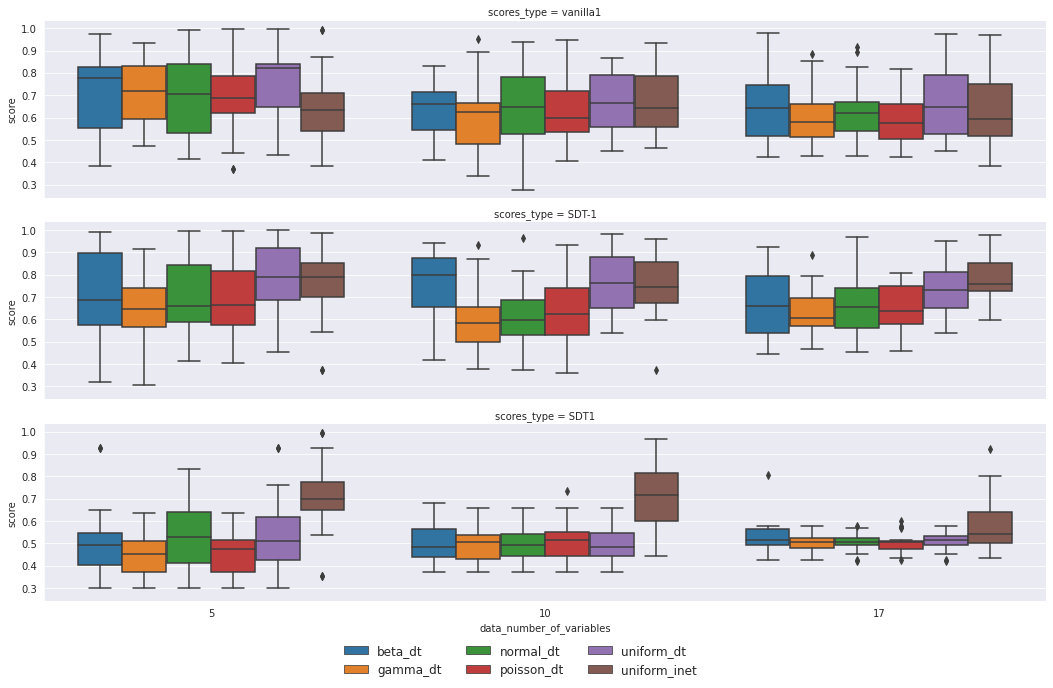

In [30]:
plot = plot_results_v2(
                 #data_reduced=results_complete_distributions_extended[results_complete_distributions_extended['data_number_of_variables'] == 5],
                 data_reduced=results_complete_distributions_extended,
                 col='scores_type',
                 x='data_number_of_variables',
                 y='score',
                 hue='dt_score_identifier',
                 plot_type=sns.boxplot
                )    

plt.savefig('./evaluation_results/results_complete_distributions_extended.pdf', bbox_inches = 'tight', pad_inches = 0)